In [28]:
import numpy as np
import tensorflow as tf
from keras.datasets import reuters
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers

In [29]:
#Load in preprocessed trainging and test data
(trainData, trainLabels), (testData, testLabels) = reuters.load_data(num_words = 10000)

#Test print
print(len(trainData))
print(len(testData))
print(len(testLabels))
print(len(trainLabels))

8982
2246
2246
8982


In [30]:
#Vectorize training and label data as tensors
def vectorizeInput(sequences, ndmin=10000):
    results = np.zeros((len(sequences), ndmin))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

def vectorizeCategorical(labels, ndmin=46):
    results = np.zeros((len(labels), ndmin))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

xTrain = vectorizeInput(trainData)
xTest = vectorizeInput(testData)
yTrain = vectorizeCategorical(trainLabels)
yTest = vectorizeCategorical(testLabels)

In [31]:
#Init the model, 64 layer dense models with softmax activation to measure the proposed / true probability distribution
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation="softmax"))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
#Train model 
xVal = xTrain[:1000]
partialXTrain = xTrain[1000:]

yVal = yTrain[:1000]
partialYTrain = yTrain[1000:]

history = model.fit(partialXTrain, partialYTrain, epochs=20, batch_size=512, validation_data=(xVal, yVal))

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 2.7691 - accuracy: 0.5139 - val_loss: 1.8532 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.5300 - accuracy: 0.6928 - val_loss: 1.3701 - val_accuracy: 0.6940
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1517 - accuracy: 0.7494 - val_loss: 1.1981 - val_accuracy: 0.7300
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9328 - accuracy: 0.8022 - val_loss: 1.1086 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7692 - accuracy: 0.8343 - val_loss: 1.0202 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6359 - accuracy: 0.8616 - val_loss: 0.9796 - val_accuracy: 0.7880
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5291 - accuracy: 0.8840 - val_loss: 0.9669 - val_accuracy: 0.7890
Epoch 8/20
16

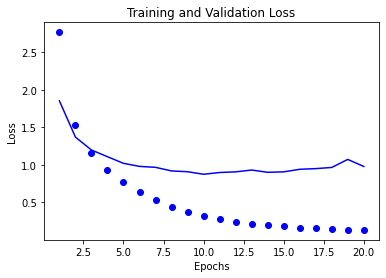

In [33]:
#Import matplotlib for data visualization
import matplotlib.pyplot as plt

loss = history.history['loss']
valLoss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, valLoss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#Model begins to overfit data after ~8 or 9 epochs